In order to be able to train and test the data to predict a player's fantasy points, let's first start by adding a column that reprisents the target variable, aka the following weeks total points for that player, given the current week's stats for that player.

In [2]:
import pandas as pd
import numpy as np

raw = pd.read_csv('top500histories', index_col=0)

In [3]:
raw.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'id_', 'sum_points', 'web_name', 'team',
       'sum_minutes', 'next_week_points', 'team_a_conceded_rank',
       'points_per_90'],
      dtype='object')

In [4]:
raw_sorted = raw.sort_values('round')

In [5]:
df = raw_sorted[['id_', 'web_name', 'round', 'goals_scored', 'assists', 'clean_sheets', 'bps', 'saves', 'minutes', 'sum_points', 'points_per_90', 'next_week_points']]

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
m = ols('next_week_points ~ goals_scored + assists + clean_sheets + bps + saves + minutes + sum_points + points_per_90',  df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:       next_week_points   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     279.0
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:20:38   Log-Likelihood:                -23036.
No. Observations:               10159   AIC:                         4.609e+04
Df Residuals:                   10150   BIC:                         4.615e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4090      0.037     11.139

In [8]:
df

,id_,web_name,round,goals_scored,assists,clean_sheets,bps,saves,minutes,sum_points,points_per_90,next_week_points
0,166,Vardy,1,0,0,1,5,0,90,2,2.000000,2
1295,147,Calvert-Lewin,1,0,0,1,5,0,68,2,2.647059,2
7180,422,André Gomes,1,0,0,0,6,0,45,1,2.000000,2
7159,136,Meyer,1,0,0,1,5,0,90,2,2.000000,2
1316,293,O'Connell,1,0,0,0,12,0,90,2,2.000000,6
7138,53,Bissouma,1,0,0,0,0,0,0,0,0.000000,0
7117,279,Srbeny,1,0,0,0,0,0,0,0,0.000000,0
1337,363,Deulofeu,1,0,0,0,1,0,45,1,2.000000,2
7096,406,Vinagre,1,0,0,0,0,0,0,0,0.000000,0
7075,523,Lo Celso,1,0,0,0,0,0,0,0,0.000000,1


In [9]:
df['predictions'] = m.predict(df[df['round'] == 16])

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.head(50)

,id_,web_name,round,goals_scored,assists,clean_sheets,bps,saves,minutes,sum_points,points_per_90,next_week_points,predictions
0,166,Vardy,1,0,0,1,5,0,90,2,2.000000,2,NaN
1295,147,Calvert-Lewin,1,0,0,1,5,0,68,2,2.647059,2,NaN
7180,422,André Gomes,1,0,0,0,6,0,45,1,2.000000,2,NaN
7159,136,Meyer,1,0,0,1,5,0,90,2,2.000000,2,NaN
1316,293,O'Connell,1,0,0,0,12,0,90,2,2.000000,6,NaN
7138,53,Bissouma,1,0,0,0,0,0,0,0,0.000000,0,NaN
7117,279,Srbeny,1,0,0,0,0,0,0,0,0.000000,0,NaN
1337,363,Deulofeu,1,0,0,0,1,0,45,1,2.000000,2,NaN
7096,406,Vinagre,1,0,0,0,0,0,0,0,0.000000,0,NaN
7075,523,Lo Celso,1,0,0,0,0,0,0,0,0.000000,1,NaN


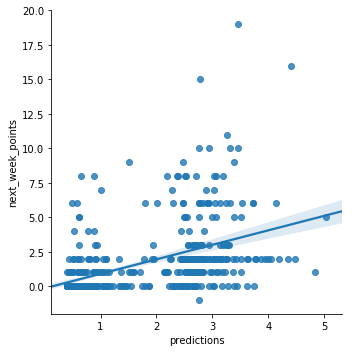

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='predictions', y='next_week_points', data=df)

plt.show()

In [19]:
predictions = df[df['round'] == 15].sort_values('predictions', ascending=False)
predictions.head()

,id_,web_name,round,goals_scored,assists,clean_sheets,bps,saves,minutes,sum_points,points_per_90,next_week_points,predictions
9412,296,Stearman,15,0,0,0,0,0,0,0,0.000000,0,NaN
10152,412,Ruddy,15,0,0,0,0,0,0,0,0.000000,0,NaN
7194,422,André Gomes,15,0,0,0,0,0,0,13,2.003425,0,NaN
9663,51,Izquierdo,15,0,0,0,0,0,0,0,0.000000,0,NaN
9167,229,Dalot,15,0,0,0,0,0,0,1,1.525424,0,NaN


In [36]:
predictions.to_csv('predictions', index=False)